In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re

url = "https://covid19.ncdc.gov.ng/"

source = requests.get(url).text
soup = BeautifulSoup(source, 'lxml')

In [2]:
table = soup.find("table", attrs={"id": "custom1"})
# print(table)

In [3]:
table_head = soup.thead.find_all("tr")
# table_head

In [4]:
table_body = soup.tbody.find_all("tr")
# table_body

In [5]:
headings = []

for th in table_head[0].find_all("th"):
    a = th.text.replace('\n', ' ').strip()
    headings.append(a)

    print(a)

States Affected
No. of Cases (Lab Confirmed)
No. of Cases (on admission)
No. Discharged
No. of Deaths


In [6]:
data = []
for tr in table_body:
    t_row = {}
    # Each table row is stored in the form of
    # t_row = {'States Affected': '', 'No. of Cases (Lab Confirmed)': '', 'No. of Cases (on admission)': ''...} 

    # find all td's in tr and zip it with headings

    for td, th in zip(tr.find_all("td"), headings): 
        t_row[th] = td.text.replace('\n', '').strip()
    data.append(t_row)

In [7]:
df = pd.DataFrame(data)

In [8]:
df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"1,990","1,455",502,33
1,Kano,693,586,74,33
2,FCT,360,288,65,7
3,Katsina,208,179,18,11
4,Bauchi,190,164,23,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               35 non-null     object
 1   No. of Cases (Lab Confirmed)  35 non-null     object
 2   No. of Cases (on admission)   35 non-null     object
 3   No. Discharged                35 non-null     object
 4   No. of Deaths                 35 non-null     object
dtypes: object(5)
memory usage: 764.0+ bytes


In [10]:
for column in df.columns:
    df[column] = df[column].str.replace(r"[^\.a-zA-Z0-9_]", '')
    try:
        df[column] = df[column].astype("int64")
    except Exception as e:
        print("Column datatype cannot be converted\n") 

Column datatype cannot be converted



In [11]:
%matplotlib inline
from math import pi

import matplotlib.pyplot as plt
from math import fsum


fontsize = 12
blue    = '#008fd5'
red     = '#fc4f30'
yellow  = '#e5ae37'
green   = '#6d904f'
skye    = '#33D1FF'
dred    = 'r'
pink    = "#FF338A"
lgreen  = '#99FF33'

colors = [blue, green, red, yellow, skye, dred, lgreen, pink]

width = 600

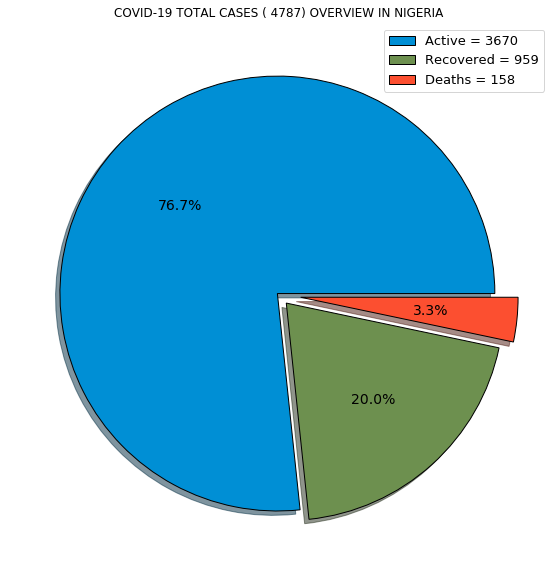

In [12]:
# set plot size
plt.rcParams['figure.figsize'] = [10, 10]

pies = df[["No. of Cases (Lab Confirmed)",'No. of Cases (on admission)','No. Discharged', 'No. of Deaths']]

col_sum = []
for col in pies.sum(axis = 0, skipna=True):
    col_sum.append(col)


# Plot data
labels = [ 'Active = {:.0f}'.format(col_sum[1]), 
           'Recovered = {:.0f}'.format(col_sum[2]), 
           'Deaths = {:.0f}'.format(col_sum[3])]

explode = [0.01, 0.05, 0.1]

# Plot
plt.pie(col_sum[1:], colors=colors, explode=explode, shadow=True, autopct='%1.1f%%', 
        wedgeprops={'edgecolor':'black'}, textprops={'fontsize': 14})

plt.legend(labels, loc="best", prop={'size': 13})
plt.title(f"COVID-19 TOTAL CASES ( {col_sum[0]}) OVERVIEW IN NIGERIA" )
plt.show()

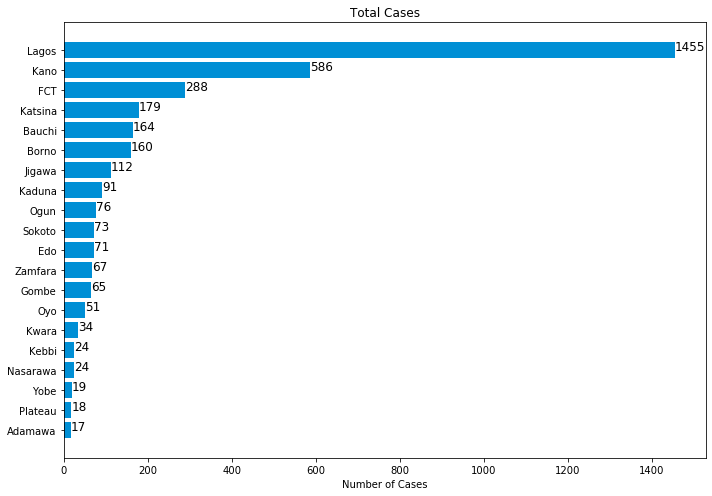

In [13]:
# set plot size
plt.rcParams['figure.figsize'] = [10, 7]

# sort data by total cases in descending order
con_tc = df.sort_values(by='No. of Cases (on admission)')

# picking the last 20 countries
con_tc = con_tc.tail(20)

# plot axis
x_tc = con_tc['States Affected']
y_tc = con_tc['No. of Cases (on admission)']

# plot type
plt.barh(x_tc,y_tc,  color=colors[0])

# plot labels
plt.title("Total Cases")
plt.xlabel("Number of Cases")

plt.tight_layout()

for index, value in enumerate(y_tc):
    s = '{:.0f}'.format(value)
    plt.text(value, index, str(s), fontsize=fontsize)


plt.show()

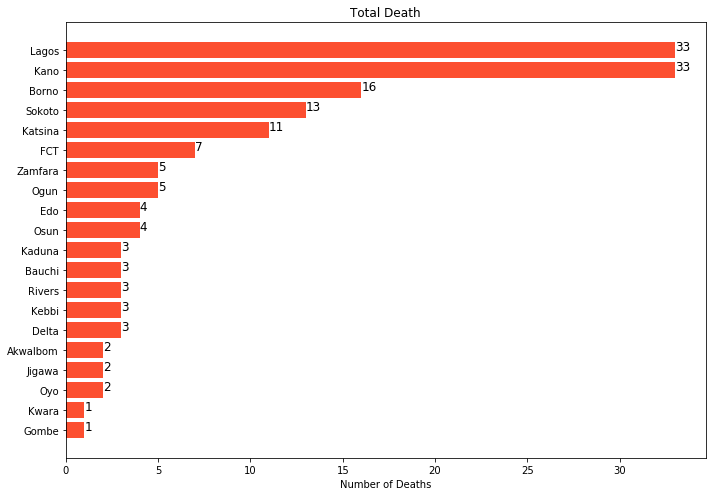

In [14]:
# set plot size
plt.rcParams['figure.figsize'] = [10, 7]

# sorting the data by total death in ascending order
con_td = df.sort_values(by='No. of Deaths')

# picking the last 20 countries
con_td = con_td.tail(20)

# plot axis
x_td = con_td['States Affected']
y_td = con_td['No. of Deaths']

# plot type
plt.barh(x_td,y_td, color=colors[2] )

# plot label
plt.title("Total Death")
plt.xlabel("Number of Deaths")

plt.tight_layout()

for index, value in enumerate(y_td):
    s = '{:.0f}'.format(value)
    plt.text(value, index, str(s), fontsize=fontsize)

plt.show()

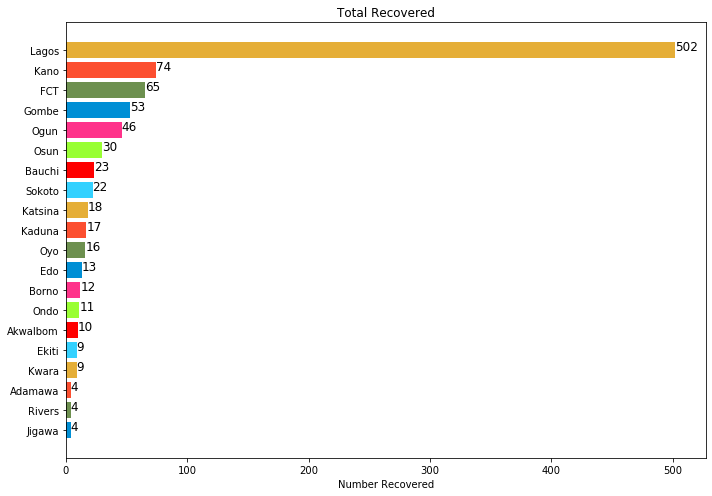

In [15]:
# set plot size
plt.rcParams['figure.figsize'] = [10, 7]

# sorting the data by total death in ascending order
con_tr = df.sort_values(by='No. Discharged')


# picking the last 20 countries
con_tr = con_tr.tail(20)

x_tr = con_tr['States Affected']
y_tr = con_tr['No. Discharged']

# plot type
plt.barh(x_tr,y_tr,  color=colors )

# plot label
plt.title("Total Recovered")
plt.xlabel("Number Recovered")

plt.tight_layout()

for index, value in enumerate(y_tr):
    s = '{:.0f}'.format(value)
    plt.text(value, index, str(s), fontsize=fontsize)

plt.show()